In [1]:
import pandas as pd
import os

In [2]:
current_working_dir = os.getcwd()
file_path = os.path.join(current_working_dir, 'folder_baru/Skripsi.xlsx' )

In [3]:
data_fast = pd.read_excel(file_path,sheet_name=0)
data_slow = pd.read_excel(file_path,sheet_name=1)

In [4]:
df_fast = pd.DataFrame(data_fast)
df_slow = pd.DataFrame(data_slow)

In [5]:
df_fast.drop(columns=['Unnamed: 7','Unnamed: 9'], inplace=True)
df_slow.drop(columns=['Unnamed: 7','Unnamed: 9'], inplace=True)

In [6]:
df_fast.dropna(inplace=True, axis=0)
df_slow.dropna(inplace=True, axis=0)

In [7]:
df_fast["SoC in Ah"] = df_fast["SoC in A*min"]/60
df_slow["SoC in Ah"] = df_slow["SoC in A*min"]/60

In [8]:
df_fast.head()

,Menit,Vdc,Iac,Idc,Pin,Pout,Efisiensi,SoC in A*min,"SoC, fast",SoC in Ah
0,0,25.5,0.68,5.00,149.6,127.500,85.227273,0.000,0.000000,0.000000
1,1,25.6,0.67,5.00,147.4,128.000,86.838535,5.000,1.255745,0.083333
2,2,25.7,0.68,5.01,149.6,128.757,86.067513,10.005,2.512746,0.166750
3,3,25.8,0.68,5.00,149.6,129.000,86.229947,15.010,3.769747,0.250167
4,4,25.9,0.69,5.00,151.8,129.500,85.309618,20.010,5.025492,0.333500


In [9]:
df_slow.head()

,Menit,Vdc,Iac,Idc,Pin,Pout,Efisiensi,SoC in A*min,"SoC, slow",SoC in Ah
0,0,25.5,0.32,2.5,70.4,63.75,90.553977,0.0,0.000000,0.000000
1,5,25.6,0.32,2.5,70.4,64.00,90.909091,12.5,3.230392,0.208333
2,10,25.7,0.32,2.5,70.4,64.25,91.264205,25.0,6.460783,0.416667
3,15,25.8,0.31,2.5,68.2,64.50,94.574780,37.5,9.691175,0.625000
4,20,25.9,0.31,2.5,68.2,64.75,94.941349,50.0,12.921566,0.833333


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe
%matplotlib inline

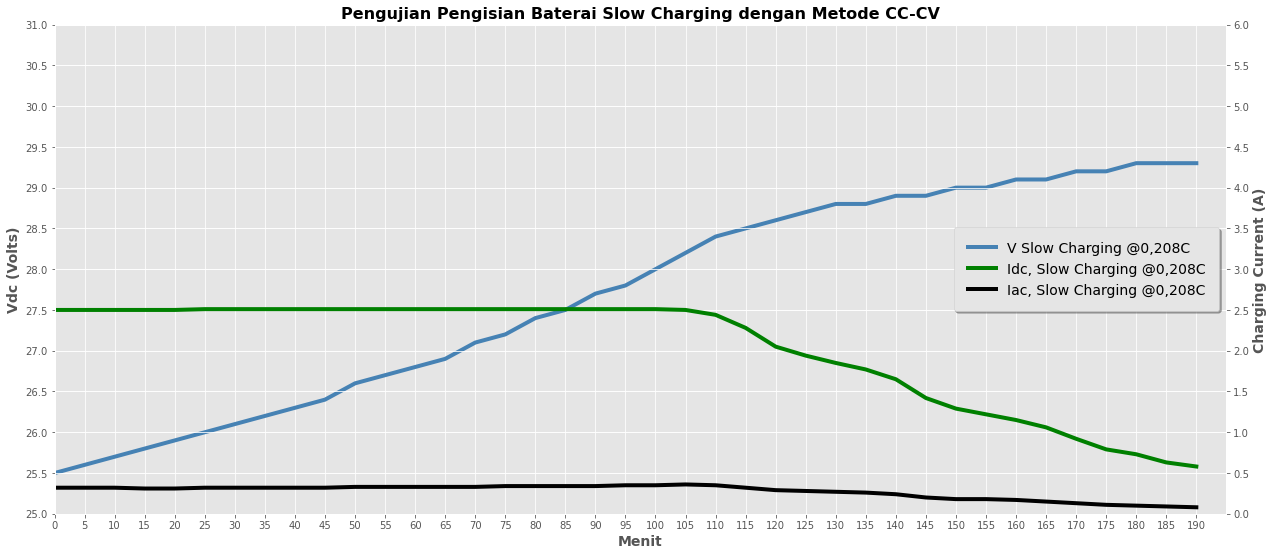

In [24]:
fig, ax = plt.subplots(figsize = (21, 9))
ax2 = ax.twinx()
plt.style.use('ggplot')

# ax.plot(df_fast["Menit"], df_fast["SoC, fast"], label="SoC, Fast Charging @0,416C", linewidth=4, color='orange')
ax.plot(df_slow["Menit"], df_slow["Vdc"], label="V Slow Charging @0,208C", linewidth=4, color='steelblue')
ax.set_xlabel("Menit", fontsize=14, fontweight='bold')
ax.set_ylabel("Vdc (Volts)", fontsize=14, fontweight='bold')
ax.set_xlim(0,195)
ax.set_ylim(25,31)
ax.set_yticks(np.arange(25.00,31.50,0.5))
ax.set_xticks(range(0,195,5))
# ax.legend(fontsize=14, loc='upper left')

# ax2.plot(df_fast["Menit"], df_fast["Idc"], label="Idc, Fast Charging @0,416C", linewidth=4, color='red')
ax2.plot(df_slow["Menit"], df_slow["Idc"], label="Idc, Slow Charging @0,208C", linewidth=4, color='green')
ax2.plot(df_slow["Menit"], df_slow["Iac"], label="Iac, Slow Charging @0,208C", linewidth=4, color='black')
ax2.set_ylabel("Charging Current (A)", fontsize=14, fontweight='bold')
ax2.set_xlim(0,195)
ax2.set_ylim(0,3)
ax2.set_yticks(np.arange(0,6.5,0.5))
# ax2.legend(fontsize=14, loc='center right')
# ax.axvline(x=105, color='black', linestyle='--', alpha= 0.3, linewidth=3)
# ax2.axvline(x=43, color='black', linestyle='--', alpha= 0.3, linewidth=3)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax2.legend(lines, labels, loc='center right', fontsize=14, fancybox= True, framealpha=1, shadow=True, borderpad=1)
# ax2.annotate("SoC fast", (32,2.6), c='orange', fontsize=14, weight='bold', rotation=44, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax2.annotate("SoC slow", (30,1.2),c='lime', fontsize=14, weight='bold', rotation=31, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax.annotate("Idc fast", (10,90), c='red', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax.annotate("Idc slow", (10,47),c='green', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# ax.annotate("CC -> CV (fast)", (45,90), c='r', fontsize=12, weight='bold')
# ax.annotate("CC -> CV (slow)", (108,45),c='g', fontsize=12, weight='bold')
plt.title("Pengujian Pengisian Baterai Slow Charging dengan Metode CC-CV", fontsize=16, fontweight='bold')
plt.savefig('Pengujian Slow Charging.jpg')
plt.show()

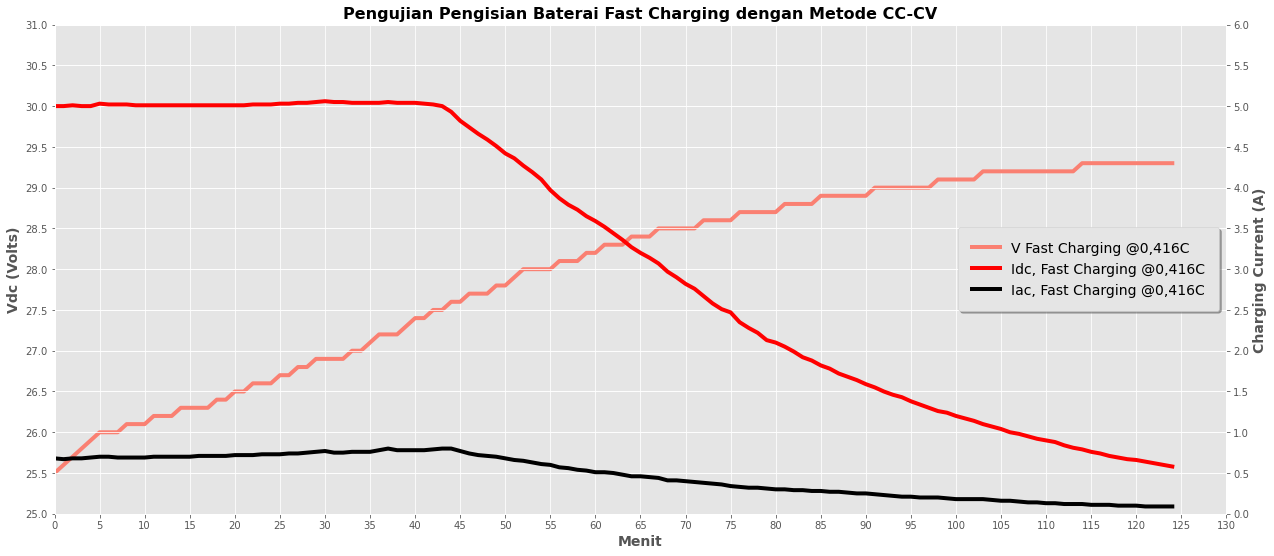

In [27]:
fig, ax = plt.subplots(figsize = (21, 9))
ax2 = ax.twinx()
plt.style.use('ggplot')

ax.plot(df_fast["Menit"], df_fast["Vdc"], label="V Fast Charging @0,416C", linewidth=4, color='salmon')
# ax.plot(df_slow["Menit"], df_slow["Vdc"], label="V Slow Charging @0,208C", linewidth=4, color='steelblue')
ax.set_xlabel("Menit", fontsize=14, fontweight='bold')
ax.set_ylabel("Vdc (Volts)", fontsize=14, fontweight='bold')
ax.set_xlim(0,130)
ax.set_ylim(25,31)
ax.set_yticks(np.arange(25.00,31.50,0.5))
ax.set_xticks(range(0,135,5))
# ax.legend(fontsize=14, loc='upper left')

ax2.plot(df_fast["Menit"], df_fast["Idc"], label="Idc, Fast Charging @0,416C", linewidth=4, color='red')
ax2.plot(df_fast["Menit"], df_fast["Iac"], label="Iac, Fast Charging @0,416C", linewidth=4, color='black')
# ax2.plot(df_slow["Menit"], df_slow["Idc"], label="Idc, Slow Charging @0,208C", linewidth=4, color='green')
# ax2.plot(df_slow["Menit"], df_slow["Iac"], label="Iac, Slow Charging @0,208C", linewidth=4, color='black')
ax2.set_ylabel("Charging Current (A)", fontsize=14, fontweight='bold')
ax2.set_xlim(0,130)
ax2.set_ylim(0,3)
ax2.set_yticks(np.arange(0,6.5,0.5))
# ax2.legend(fontsize=14, loc='center right')
# ax.axvline(x=105, color='black', linestyle='--', alpha= 0.3, linewidth=3)
# ax2.axvline(x=43, color='black', linestyle='--', alpha= 0.3, linewidth=3)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax2.legend(lines, labels, loc='center right', fontsize=14, fancybox= True, framealpha=1, shadow=True, borderpad=1)
# ax2.annotate("SoC fast", (32,2.6), c='orange', fontsize=14, weight='bold', rotation=44, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax2.annotate("SoC slow", (30,1.2),c='lime', fontsize=14, weight='bold', rotation=31, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax.annotate("Idc fast", (10,90), c='red', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
# ax.annotate("Idc slow", (10,47),c='green', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# ax.annotate("CC -> CV (fast)", (45,90), c='r', fontsize=12, weight='bold')
# ax.annotate("CC -> CV (slow)", (108,45),c='g', fontsize=12, weight='bold')
plt.title("Pengujian Pengisian Baterai Fast Charging dengan Metode CC-CV", fontsize=16, fontweight='bold')
plt.savefig('Pengujian Fast Charging.jpg')
plt.show()

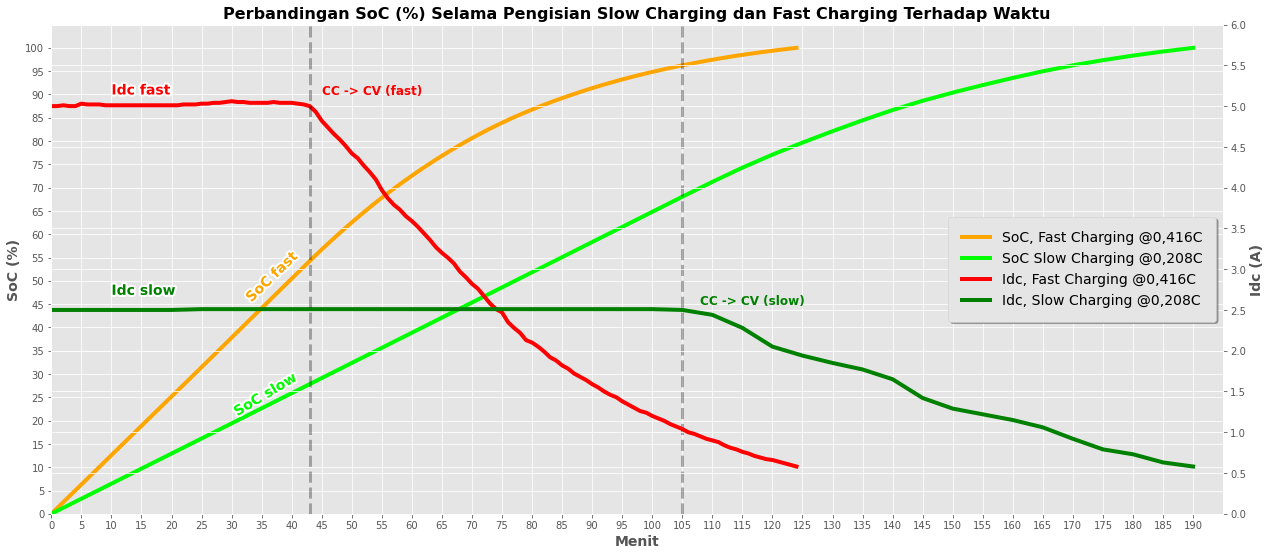

In [82]:
fig, ax = plt.subplots(figsize = (21, 9))
ax2 = ax.twinx()
plt.style.use('ggplot')

ax.plot(df_fast["Menit"], df_fast["SoC, fast"], label="SoC, Fast Charging @0,416C", linewidth=4, color='orange')
ax.plot(df_slow["Menit"], df_slow["SoC, slow"], label="SoC Slow Charging @0,208C", linewidth=4, color='lime')
ax.set_xlabel("Menit", fontsize=14, fontweight='bold')
ax.set_ylabel("SoC (%)", fontsize=14, fontweight='bold')
ax.set_xlim(0,195)
ax.set_ylim(0,105)
ax.set_yticks(range(0,105,5))
ax.set_xticks(range(0,195,5))
# ax.legend(fontsize=14, loc='upper left')


ax2.plot(df_fast["Menit"], df_fast["Idc"], label="Idc, Fast Charging @0,416C", linewidth=4, color='red')
ax2.plot(df_slow["Menit"], df_slow["Idc"], label="Idc, Slow Charging @0,208C", linewidth=4, color='green')
ax2.set_ylabel("Idc (A)", fontsize=14, fontweight='bold')
ax2.set_xlim(0,195)
ax2.set_ylim(0,6)
ax2.set_yticks(np.arange(0,6.5,0.5))
# ax2.legend(fontsize=14, loc='center right')
ax.axvline(x=105, color='black', linestyle='--', alpha= 0.3, linewidth=3)
ax2.axvline(x=43, color='black', linestyle='--', alpha= 0.3, linewidth=3)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax2.legend(lines, labels, loc='center right', fontsize=14, fancybox= True, framealpha=1, shadow=True, borderpad=1)
ax2.annotate("SoC fast", (32,2.6), c='orange', fontsize=14, weight='bold', rotation=44, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax2.annotate("SoC slow", (30,1.2),c='lime', fontsize=14, weight='bold', rotation=31, path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax.annotate("Idc fast", (10,90), c='red', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax.annotate("Idc slow", (10,47),c='green', fontsize=14, weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax.annotate("CC -> CV (fast)", (45,90), c='r', fontsize=12, weight='bold')
ax.annotate("CC -> CV (slow)", (108,45),c='g', fontsize=12, weight='bold')
plt.title("Perbandingan SoC (%) Selama Pengisian Slow Charging dan Fast Charging Terhadap Waktu", fontsize=16, fontweight='bold')
plt.savefig('Perbandingan SOC_persen_withV.jpg')
plt.show()

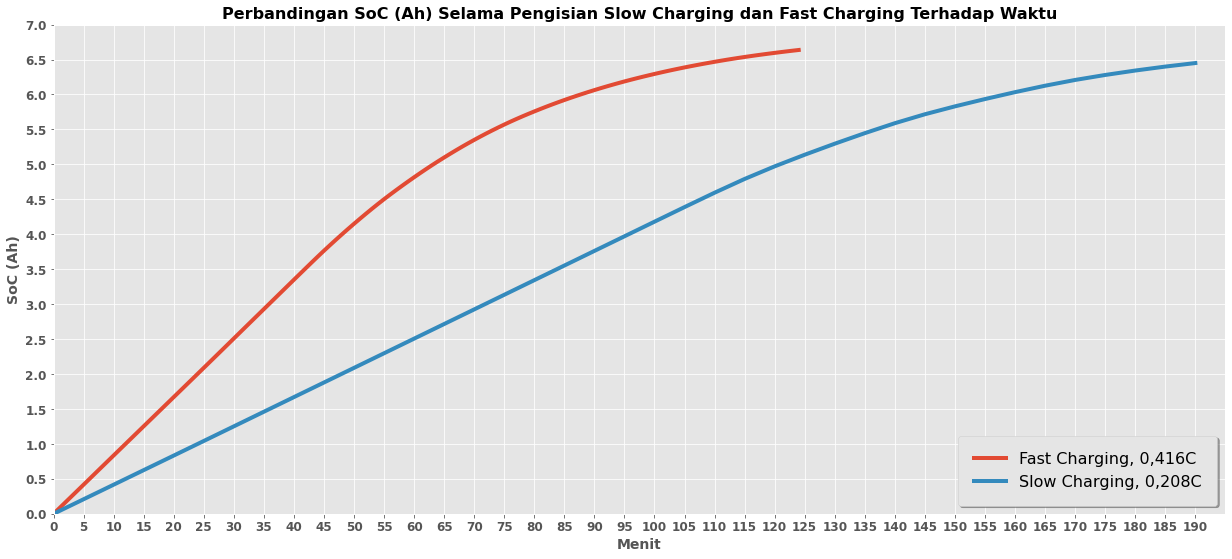

In [87]:
import numpy as np
plt.figure(figsize=(21,9))
plt.style.use('ggplot')
plt.plot(df_fast["Menit"], df_fast["SoC in Ah"], label="Fast Charging, 0,416C", linewidth=4)
plt.plot(df_slow["Menit"], df_slow["SoC in Ah"], label="Slow Charging, 0,208C", linewidth=4)
plt.title("Perbandingan SoC (Ah) Selama Pengisian Slow Charging dan Fast Charging Terhadap Waktu", fontsize=16, fontweight='bold')
plt.xlabel("Menit", fontsize=14, fontweight='bold')
plt.ylabel("SoC (Ah)", fontsize=14, fontweight='bold')
plt.xticks(range(0,195,5), fontsize=12, fontweight='bold')
plt.xlim(0,195)
import numpy as np
plt.yticks((np.arange(0,7.5,0.5)), fontsize=12, fontweight='bold')
plt.ylim(0,7)
plt.legend(fontsize=16, fancybox= True, framealpha=1, shadow=True, borderpad=1, loc='lower right')
plt.savefig('Perbandingan SOC_Ah.jpg')
plt.show()

In [12]:
df_slow.to_csv('df_slow.csv', index=False)

In [13]:
df_fast.to_csv('df_fast.csv', index=False)